<a href="https://colab.research.google.com/github/yootina/Deep/blob/master/231213_as_06_KNN_live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# https://www.kaggle.com/datasets/akhil0007/wine-data
url = "https://raw.githubusercontent.com/BigDeepData/2312_as/main/data/wine_info.csv"
df = pd.read_csv(url, index_col=0)
df.fillna(df.median(), inplace=True)
df # 다중분류 문제 데이터 (딥러닝 때 봤던 와인 데이터랑은 다른 데이터)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.05,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [ ]:
df.head()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.tail()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format
df.describe()
# 1. 변수마다 값의 범위가 다름 -> 거리기반 (단위가 통일되어 있지 않으면 큰 값의 독립변수가 다른 변수의 영향을 상쇄시킴)
# => 단위를 비슷하게 만들어줘야함 => 스케일링(scaling)
# 스케일링(scaling) : 독립변수의 범위를 동일한 수준으로 만들어주는 작업/기법
# 2. 이상치 (outlier) : 갑자기 폭증하거나 갑자기 줄어드는 그러한 '튀는 값' -> 왜곡

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,12.9898,2.3363,2.3665,19.4949,99.7416,2.2951,2.0293,0.3617,1.5909,5.0581,0.9574,2.6117,746.8933,0.9382
std,0.7999,1.1171,0.2743,3.3396,14.2825,0.6259,0.9989,0.1244,0.5724,2.3183,0.2286,0.7100,314.9075,0.7750
min,11.0300,0.7400,1.3600,10.6000,70.0000,0.9800,0.3400,0.1300,0.4100,1.2800,0.4800,1.2700,278.0000,0.0000
25%,12.3625,1.6025,2.2100,17.2000,88.0000,1.7425,1.2050,0.2700,1.2500,3.2200,0.7825,1.9375,500.5000,0.0000
50%,13.0500,1.8650,2.3600,19.5000,98.0000,2.3550,2.1350,0.3400,1.5550,4.6900,0.9650,2.7800,673.5000,1.0000
75%,13.6625,3.0825,2.5575,21.5000,107.0000,2.8000,2.8750,0.4375,1.9500,6.2000,1.1200,3.1700,985.0000,2.0000
max,14.7500,5.8000,3.2300,30.0000,162.0000,3.8800,5.0800,0.6600,3.5800,13.0000,1.7100,4.0000,"1,680.0000",2.0000


<Axes: xlabel='color_intensity', ylabel='Count'>

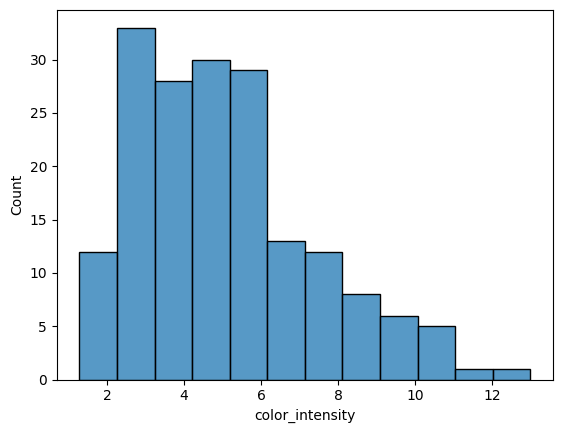

In [ ]:
sns.histplot(df, x='color_intensity')

In [ ]:
# 등급 -> Class
df['class'] = df['class'].add(1)
df['class'].value_counts() # 2, 1, 3.

2    71
1    59
3    48
Name: class, dtype: int64

<Axes: ylabel='class'>

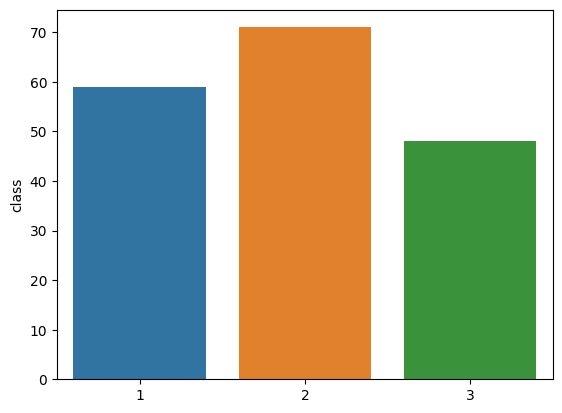

In [ ]:
vc = df['class'].value_counts()
sns.barplot(x = vc.index, y = vc)

# 전처리

### 스케일링
* 데이터의 스케일(Scale, 범위)을 맞추는 작업
* K-최근접 이웃은 거리 기반의 알고리즘이기 때문에 이러한 스케일 차이는 결과를 왜곡할 수 있음
* 스케일링은 이러한 문제를 해결하기 위해 인위적으로 각 컬럼(변수)이 비슷한 범위를 가지도록 만드는 작업
* 데이터를 **동등한 수준**에서 연산하게 함

#### 스케일링 종류
|종류|설명
|-|-|
|표준화 스케일링 Standarad Scaling|평균이 0이 되고, 표준편차가 1이 되도록 데이터를 고르게 분포시키는 데 사용|
|로버스트 스케일링 Robust Scaling|데이터에 아웃라이어가 존재하고, 그 영향력을 그대로 유지하고 싶을 때 사용|
|최소-최대 스케일링 Min-Max Scaling|데이터 분포의 특성을 최대한 그대로 유지하고 싶을 때 사용
|정규화 스케일링 Normalizer Scaling|행 기준의 스케일링이 필요할 때 사용하나, 실제로 거의 사용하지 않음

#### 표준화 스케일링
> 데이터를 표준정규분포 형태로 변형

$x_i-mean(x)\over sd(x)$

* $x_i$ : 변수의 i번째 값
* $mean(x)$ : 해당 변수의 평균
* $sd(x)$ : 해당 변수의 표준편차

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st_scaler = StandardScaler()

In [ ]:
# df의 각 열의 평균과 표준편차 -> 학습
# 각 값에 표준화 스케일링의 공식을 적용
# df을 기준으로 표준화 스케일링을 진행하는 객체
st_scaler.fit(df)

StandardScaler()

In [ ]:
df.iloc[:, 0]

0     14.2300
1     13.0500
2     13.1600
3     14.3700
4     13.2400
        ...  
173   13.7100
174   13.4000
175   13.2700
176   13.1700
177   14.1300
Name: alcohol, Length: 178, dtype: float64

In [ ]:
st_df = st_scaler.transform(df)
st_df

array([[ 1.55484903, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.07550273, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.21340789,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.35131305,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.22594472,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.4294807 ,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [ ]:
st_df[:, 0]

array([ 1.55484903e+00,  7.55027254e-02,  2.13407890e-01,  1.73036470e+00,
        3.13702555e-01,  1.51723854e+00,  1.75543836e+00,  1.34172287e+00,
        7.55027254e-02,  1.09098621e+00,  1.39187020e+00,  1.41694387e+00,
        9.53081044e-01,  2.20676436e+00,  1.74290153e+00,  8.02639047e-01,
        1.64260687e+00,  1.05337571e+00,  1.50470170e+00,  8.15175880e-01,
        1.34172287e+00, -7.49392722e-02,  9.02933712e-01, -1.75233937e-01,
        6.39660216e-01,  7.55027254e-02,  5.01755052e-01,  3.88923554e-01,
        1.10352304e+00,  1.29157554e+00,  9.28007378e-01,  7.39954881e-01,
        8.65323212e-01,  9.65617877e-01,  6.52197049e-01,  6.14586550e-01,
        3.63849887e-01,  7.55027254e-02,  1.00576392e-01,  1.54231220e+00,
        7.14881215e-01,  5.26828718e-01,  1.11605987e+00,  3.13702555e-01,
        7.55027254e-02,  1.52977537e+00,  1.74290153e+00,  1.14113354e+00,
        1.39187020e+00,  1.19128087e+00,  7.55027254e-02,  1.05337571e+00,
        1.04083888e+00,  

In [ ]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.2300,1.7100,2.4300,15.6000,127,2.8000,3.0600,0.2800,2.2900,5.6400,1.0400,3.9200,1065,1
1,13.0500,1.7800,2.1400,11.2000,100,2.6500,2.7600,0.2600,1.2800,4.3800,1.0500,3.4000,1050,1
2,13.1600,2.3600,2.6700,18.6000,101,2.8000,3.2400,0.3000,2.8100,5.6800,1.0300,3.1700,1185,1
3,14.3700,1.9500,2.5000,16.8000,113,3.8500,3.4900,0.2400,2.1800,7.8000,0.8600,3.4500,1480,1
4,13.2400,2.5900,2.8700,21.0000,118,2.8000,2.6900,0.3900,1.8200,4.3200,1.0400,2.9300,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.7100,5.6500,2.4500,20.5000,95,1.6800,0.6100,0.5200,1.0600,7.7000,0.6400,1.7400,740,3
174,13.4000,3.9100,2.4800,23.0000,102,1.8000,0.7500,0.4300,1.4100,7.3000,0.7000,1.5600,750,3
175,13.2700,4.2800,2.2600,20.0000,120,1.5900,0.6900,0.4300,1.3500,10.2000,0.5900,1.5600,835,3
176,13.1700,2.5900,2.3700,20.0000,120,1.6500,0.6800,0.5300,1.4600,9.3000,0.6000,1.6200,840,3


In [ ]:
st_df2 = pd.DataFrame(st_df, columns = df.columns)
st_df2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.5548,-0.5622,0.2321,-1.1696,1.9139,0.8090,1.0348,-0.6589,1.2249,0.2517,0.3622,1.8479,1.0130,-1.2139
1,0.0755,-0.4994,-0.8280,-2.4908,0.0181,0.5686,0.7336,-0.8201,-0.5447,-0.2933,0.4061,1.1134,0.9652,-1.2139
2,0.2134,0.0212,1.1093,-0.2687,0.0884,0.8090,1.2155,-0.4977,2.1360,0.2690,0.3183,0.7886,1.3951,-1.2139
3,1.7304,-0.3468,0.4879,-0.8093,0.9309,2.4914,1.4665,-0.9813,1.0322,1.1861,-0.4275,1.1841,2.3346,-1.2139
4,0.3137,0.2277,1.8404,0.4519,1.2820,0.8090,0.6634,0.2278,0.4014,-0.3193,0.3622,0.4496,-0.0379,-1.2139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.9029,2.9745,0.3052,0.3018,-0.3329,-0.9856,-1.4249,1.2756,-0.9302,1.1428,-1.3928,-1.2312,-0.0220,1.3739
174,0.5143,1.4126,0.4148,1.0525,0.1586,-0.7933,-1.2843,0.5502,-0.3170,0.9698,-1.1295,-1.4854,0.0099,1.3739
175,0.3513,1.7447,-0.3894,0.1517,1.4224,-1.1298,-1.3446,0.5502,-0.4221,2.2242,-1.6121,-1.4854,0.2806,1.3739
176,0.2259,0.2277,0.0127,0.1517,1.4224,-1.0337,-1.3546,1.3562,-0.2293,1.8349,-1.5683,-1.4007,0.2965,1.3739


<Axes: xlabel='color_intensity', ylabel='Density'>

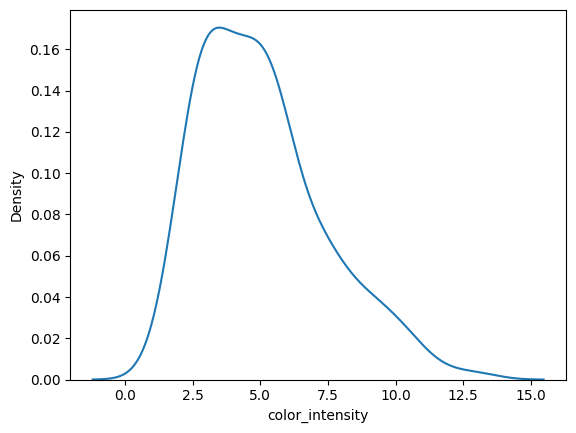

In [ ]:
sns.kdeplot(data=df, x= 'color_intensity')

<Axes: xlabel='color_intensity', ylabel='Density'>

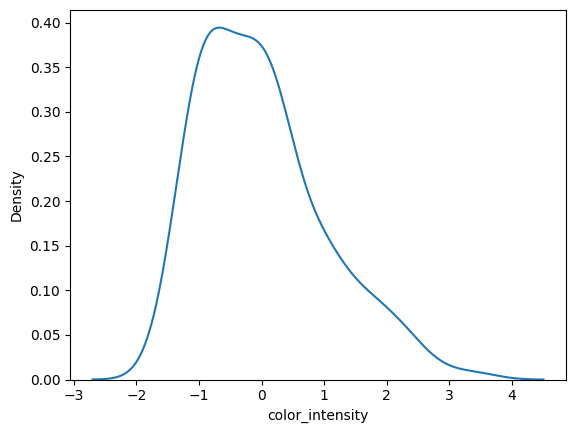

In [ ]:
sns.kdeplot(data=st_df2, x= 'color_intensity')

In [ ]:
st_df2.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000
std,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028
min,-2.4569,-1.4330,-3.6792,-2.6710,-2.0883,-2.1072,-1.6960,-1.8679,-2.0690,-1.6343,-2.0947,-1.8951,-1.4932,-1.2139
25%,-0.7864,-0.6587,-0.5721,-0.6891,-0.8244,-0.8855,-0.8275,-0.7395,-0.5973,-0.7951,-0.7676,-0.9522,-0.7846,-1.2139
50%,0.0755,-0.4231,-0.0238,0.0015,-0.1223,0.0960,0.1061,-0.1752,-0.0629,-0.1592,0.0331,0.2377,-0.2337,0.0800
75%,0.8434,0.6698,0.6981,0.6021,0.5096,0.8090,0.8491,0.6106,0.6292,0.4940,0.7132,0.7886,0.7582,1.3739
max,2.2068,3.1092,3.1563,3.1545,4.3714,2.5395,3.0628,2.4041,3.4851,3.4354,3.3017,1.9609,2.9715,1.3739


#### 로버스트 스케일링
> 사분위값을 이용하여 계산

$x_i-Q_2(x)\over Q_3(x)-Q_1(x)$

* $x_i$ : 변수의 i번째 값
* $Q_1(x)$ : 25% 지점
* $Q_2(x)$ : 50% 지점 (변수의 중윗값)
* $Q_3(x)$ : 75% 지점

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rb_scaler = RobustScaler()

In [ ]:
# fit -> transform
# fit_transform (scaler 객체 안에 fit한 정보는 유지)
rb_scaled = rb_scaler.fit_transform(df)
rb_scaled

array([[ 0.90769231, -0.10472973,  0.20143885, ...,  0.92494929,
         0.80804954, -0.5       ],
       [ 0.        , -0.05743243, -0.63309353, ...,  0.5030426 ,
         0.77708978, -0.5       ],
       [ 0.08461538,  0.33445946,  0.89208633, ...,  0.31643002,
         1.05572755, -0.5       ],
       ...,
       [ 0.16923077,  1.63175676, -0.28776978, ..., -0.98985801,
         0.33333333,  0.5       ],
       [ 0.09230769,  0.48986486,  0.02877698, ..., -0.94117647,
         0.34365325,  0.5       ],
       [ 0.83076923,  1.51013514,  1.09352518, ..., -0.95740365,
        -0.23426213,  0.5       ]])

In [ ]:
rb_df = pd.DataFrame(rb_scaled, columns=df.columns)
rb_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0.9077,-0.1047,0.2014,-0.9070,1.5263,0.4208,0.5539,-0.3582,1.0500,0.3188,0.2222,0.9249,0.8080,-0.5000
1,0.0000,-0.0574,-0.6331,-1.9302,0.1053,0.2790,0.3743,-0.4776,-0.3929,-0.1040,0.2519,0.5030,0.7771,-0.5000
2,0.0846,0.3345,0.8921,-0.2093,0.1579,0.4208,0.6617,-0.2388,1.7929,0.3322,0.1926,0.3164,1.0557,-0.5000
3,1.0154,0.0574,0.4029,-0.6279,0.7895,1.4137,0.8114,-0.5970,0.8929,1.0436,-0.3111,0.5436,1.6646,-0.5000
4,0.1462,0.4899,1.4676,0.3488,1.0526,0.4208,0.3323,0.2985,0.3786,-0.1242,0.2222,0.1217,0.1269,-0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.5077,2.5574,0.2590,0.2326,-0.1579,-0.6383,-0.9132,1.0746,-0.7071,1.0101,-0.9630,-0.8438,0.1373,0.5000
174,0.2692,1.3818,0.3453,0.8140,0.2105,-0.5248,-0.8293,0.5373,-0.2071,0.8758,-0.7852,-0.9899,0.1579,0.5000
175,0.1692,1.6318,-0.2878,0.1163,1.1579,-0.7234,-0.8653,0.5373,-0.2929,1.8490,-1.1111,-0.9899,0.3333,0.5000
176,0.0923,0.4899,0.0288,0.1163,1.1579,-0.6667,-0.8713,1.1343,-0.1357,1.5470,-1.0815,-0.9412,0.3437,0.5000


<Axes: xlabel='color_intensity', ylabel='Density'>

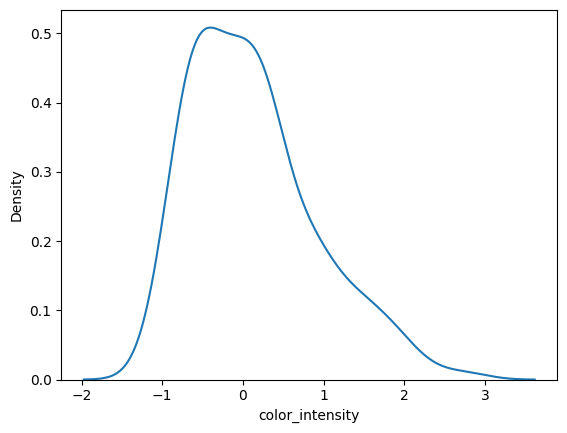

In [ ]:
sns.kdeplot(data=rb_df, x ='color_intensity')

In [ ]:
rb_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,-0.0463,0.3185,0.0188,-0.0012,0.0917,-0.0566,-0.0633,0.1298,0.0513,0.1235,-0.0224,-0.1366,0.1515,-0.0309
std,0.6153,0.7548,0.7895,0.7766,0.7517,0.5918,0.5981,0.7428,0.8177,0.7779,0.6772,0.5761,0.6500,0.3875
min,-1.5538,-0.7601,-2.8777,-2.0698,-1.4737,-1.3002,-1.0749,-1.2537,-1.6357,-1.1443,-1.4370,-1.2252,-0.8163,-0.5000
25%,-0.5288,-0.1774,-0.4317,-0.5349,-0.5263,-0.5792,-0.5569,-0.4179,-0.4357,-0.4933,-0.5407,-0.6836,-0.3571,-0.5000
50%,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.4712,0.8226,0.5683,0.4651,0.4737,0.4208,0.4431,0.5821,0.5643,0.5067,0.4593,0.3164,0.6429,0.5000
max,1.3077,2.6588,2.5036,2.4419,3.3684,1.4421,1.7635,1.9104,2.8929,2.7886,2.2074,0.9899,2.0774,0.5000


#### 최소-최대 스케일링
> 최솟값, 최댓값을 사용하여 스케일링, 모든 컬럼에서 최댓값이 1, 최솟값이 0인 형태로 변환됨

$x_i-min(x)\over max(x)-min(x)$

* $x_i$ : 변수의 i번째 값
* $min(x)$ : 최솟값
* $max(x)$ : 최댓값

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(df)
mm_df = pd.DataFrame(mm_scaled, columns=df.columns)
mm_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,0.5268,0.3155,0.5382,0.4585,0.3233,0.4535,0.3564,0.4372,0.3725,0.3224,0.3882,0.4915,0.3344,0.4691
std,0.2150,0.2208,0.1467,0.1721,0.1552,0.2158,0.2107,0.2347,0.1806,0.1978,0.1858,0.2601,0.2246,0.3875
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.3582,0.1705,0.4545,0.3402,0.1957,0.2629,0.1825,0.2642,0.2650,0.1655,0.2459,0.2445,0.1587,0.0000
50%,0.5430,0.2223,0.5348,0.4588,0.3043,0.4741,0.3787,0.3962,0.3612,0.2910,0.3943,0.5531,0.2821,0.5000
75%,0.7077,0.4629,0.6404,0.5619,0.4022,0.6276,0.5348,0.5802,0.4858,0.4198,0.5203,0.6960,0.5043,1.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


#### 스케일링 방식 선택 기준
* 아웃라이어(이상치)의 유무 : 아웃라이어 영향이 클 시 로버스트 스케일링이 적합 (4분위값 이용)
* 데이터의 기존 분포를 최대한 유지해야할 시 : 최소-최대 스케일링
* 기존 데이터가 정규분포를 따르고 있고 아웃라이어가 없는 상황 : 표준화 스케일링

#### 스케일링별 특징
|구분|결과물의 특징|
|-|-|
|표준화 스케일링|아웃라이어의 영향을 받음.<br>평균 0, 분산 1이 되게끔 분포시키기 때문에, **데이터의 기존 분포 형태가 사라지고** 정규분포를 따르는 결과물을 가져 옴|
|로버스트 스케일링|데이터에 아웃라이어가 존재할 때,<br> **아웃라이어의 영향을 받지 않음**.<br>변환된 데이터의 범위는 표준화 스케일링이나 최소-최대 스케일링보다 넓게 나타남|
|최소-최대 스케일링|아웃라이어의 영향을 받음.<br>위의 두 스케일러와 비교했을 때, **데이터의 기존 분포를 가장 있는 그대로 담아내며 스케일만 변화**시킴.<br>데이터의 범위는 0~1로 나타남|

#### 스케일링 적용 시 주의점
* 스케일링 대상에서 종속변수를 제외
* 스케일링 전 훈련셋과 시험셋을 구분

In [ ]:
# 종속변수 (y) / 독립변수들 (x)
# 훈련셋과 시험셋 구분 (train, test) => 스케일링
# X_test 스케일링은 어떻게 해요?
from sklearn.model_selection import train_test_split # 훈련셋/시험셋

# Class
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('class', axis=1), # X (독립변수)
    df['class'], test_size=0.2, random_state=19
)

In [ ]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
91,12.0000,1.5100,2.4200,22.0000,86,1.4500,1.2500,0.5000,1.6300,3.6000,1.0500,2.6500,450
27,13.3000,1.7200,2.1400,17.0000,94,2.4000,2.1900,0.2700,1.3500,3.9500,1.0200,2.7700,1285
140,12.9300,2.8100,2.7000,21.0000,96,1.5400,0.5000,0.5300,0.7500,4.6000,0.7700,2.3100,600
117,12.4200,1.6100,2.1900,22.5000,108,2.0000,2.0900,0.3400,1.6100,2.0600,1.0600,2.9600,345
62,13.6700,1.2500,1.9200,18.0000,94,2.1000,1.7900,0.3200,0.7300,3.8000,1.2300,2.4600,630


In [ ]:
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_train_scaled

array([[0.28869048, 0.15217391, 0.56684492, ..., 0.46341463, 0.50549451,
        0.12268188],
       [0.67559524, 0.19367589, 0.4171123 , ..., 0.43902439, 0.54945055,
        0.71825963],
       [0.56547619, 0.40909091, 0.71657754, ..., 0.23577236, 0.38095238,
        0.2296719 ],
       ...,
       [0.39880952, 0.06521739, 0.39572193, ..., 0.45528455, 0.54945055,
        0.2724679 ],
       [0.12797619, 0.59288538, 0.2459893 , ..., 0.2195122 , 0.56410256,
        0.20256776],
       [0.375     , 0.41304348, 0.45989305, ..., 0.54471545, 0.74358974,
        0.0085592 ]])

In [ ]:
mm_scaler.data_max_, mm_scaler.data_min_

(array([1.439e+01, 5.800e+00, 3.230e+00, 3.000e+01, 1.620e+02, 3.880e+00,
        5.080e+00, 6.300e-01, 3.580e+00, 1.300e+01, 1.710e+00, 4.000e+00,
        1.680e+03]),
 array([1.103e+01, 7.400e-01, 1.360e+00, 1.060e+01, 7.000e+01, 9.800e-01,
        3.400e-01, 1.300e-01, 4.200e-01, 1.740e+00, 4.800e-01, 1.270e+00,
        2.780e+02]))

In [ ]:
# scaler의 fit 자체는 train 데이터로만 진행을 하는데
# model을 사용해서 pred. => test 데이터는 이미 학습된 scaler를 사용한다
X_test_scaled = mm_scaler.transform(X_test)
X_test_scaled

array([[ 0.41369048,  0.72924901,  0.73262032,  0.81958763,  0.34782609,
         0.42068966,  0.37763713,  0.6       ,  0.40822785,  0.03019538,
         0.35772358,  0.67765568,  0.06205421],
       [ 0.80357143,  0.15019763,  0.71657754,  0.61340206,  0.33695652,
         0.69655172,  0.61392405,  0.32      ,  0.62025316,  0.35168739,
         0.57723577,  0.52747253,  0.71825963],
       [ 0.36309524,  0.62055336,  0.44919786,  0.40721649,  0.45652174,
         0.13793103,  0.092827  ,  0.32      ,  0.2278481 ,  0.57460036,
         0.13821138,  0.26739927,  0.41155492],
       [ 0.5297619 ,  0.31027668,  0.55614973,  0.69072165,  0.30434783,
         0.05862069,  0.15822785,  0.28      ,  0.12974684,  0.35168739,
         0.14634146,  0.03296703,  0.20114123],
       [ 0.41369048,  0.35770751,  0.48663102,  0.58762887,  0.2173913 ,
         0.24137931,  0.3164557 ,  1.06      ,  0.3164557 ,  0.08525755,
         0.30894309,  0.74358974,  0.02639087],
       [ 0.33928571,  0.140316

# 모델링 & 예측/평가

In [ ]:
# from sklearn.linear_model...
# 이미 정의된 모델 알고리즘을 SKlearn 혹은 다른 알고리즘 패키지
# Classifier : 분류문제 (다중분류도 가능함.) -> 로지스틱회귀만 이진분류. 선형회귀 - 회귀
from sklearn.neighbors import KNeighborsClassifier # 분류 문제 풀 때 (범주형 변수)
# from sklearn.neighbors import KNeighborsRegressor -> 회귀 문제 풀 때 (연속형 변수 풀 때)

In [ ]:
knn = KNeighborsClassifier() # n_neighbors : 5
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

In [ ]:
pred

array([2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 3, 3, 2, 2, 1, 2, 2, 3, 1, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 2, 1, 2, 1, 3, 3, 2, 3])

In [ ]:
knn.predict_proba(X_test_scaled) # 주변에 가까운 5개를 비교해서 몇 개가 해당 라벨인지

array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0.4, 0.6, 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ]])

In [ ]:
pred

array([2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 3, 3, 2, 2, 1, 2, 2, 3, 1, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 2, 1, 2, 1, 3, 3, 2, 3])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9166666666666666

# 하이퍼파라미터 튜닝
`KNeighborsClassifier` : 분류 문제 해결 시 사용하는 클래스<br>
`KNeighborsRegressor` : 회귀 문제 해결 시 사용하는 클래스
```
(class) KNeighborsClassifier(
    n_neighbors: int = 5, *,
    weights: str = "uniform",
    algorithm: str = "auto",
    leaf_size: int = 30,
    p: int = 2,
    metric: str = "minkowski",
    metric_params: Any | None = None,
    n_jobs: Any | None = None)
```
* n_neighbors : 예측에 참고할 이웃 수 (5개)
* weights : 예측에 사용되는 가중치 함수 - 기본값 : uniform - 모든 점에 동일한 가중치 부여
* metric : 거리 측정 기준 (minkowski)
* n_jobs : 실행할 병렬 작업 수

In [ ]:
def tuning(n: int):
    '''
    n을 받아서 해당 값으로 KNN 모델을 하이퍼 패러미터 변경
    '''
    knn = KNeighborsClassifier(n_neighbors=n) # n의 값을 넣으면 해당 n을 knn의 근접 이웃수 판단 기준으로 사용하는 모델이 만들어짐
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    score = accuracy_score(y_test, pred)
    return score

In [ ]:
tuning(7)

0.8888888888888888

In [ ]:
for i in range(1, 21):
    print(i, tuning(i))

1 0.8888888888888888
2 0.8888888888888888
3 0.8888888888888888
4 0.8888888888888888
5 0.9166666666666666
6 0.9166666666666666
7 0.8888888888888888
8 0.9166666666666666
9 0.8888888888888888
10 0.9166666666666666
11 0.9166666666666666
12 0.9166666666666666
13 0.9166666666666666
14 0.9166666666666666
15 0.9166666666666666
16 0.9166666666666666
17 0.9166666666666666
18 0.9166666666666666
19 0.9166666666666666
20 0.9444444444444444


In [ ]:
scores = [(i, tuning(i)) for i in range(1, 30, 2)]
scores

[(1, 0.8888888888888888),
 (3, 0.8888888888888888),
 (5, 0.9166666666666666),
 (7, 0.8888888888888888),
 (9, 0.8888888888888888),
 (11, 0.9166666666666666),
 (13, 0.9166666666666666),
 (15, 0.9166666666666666),
 (17, 0.9166666666666666),
 (19, 0.9166666666666666),
 (21, 0.9444444444444444),
 (23, 0.9444444444444444),
 (25, 0.9444444444444444),
 (27, 0.9444444444444444),
 (29, 0.9444444444444444)]

In [ ]:
sorted(scores, key=lambda x: x[1], reverse=True)

[(21, 0.9444444444444444),
 (23, 0.9444444444444444),
 (25, 0.9444444444444444),
 (27, 0.9444444444444444),
 (29, 0.9444444444444444),
 (5, 0.9166666666666666),
 (11, 0.9166666666666666),
 (13, 0.9166666666666666),
 (15, 0.9166666666666666),
 (17, 0.9166666666666666),
 (19, 0.9166666666666666),
 (1, 0.8888888888888888),
 (3, 0.8888888888888888),
 (7, 0.8888888888888888),
 (9, 0.8888888888888888)]

# 알고리즘 이해
* KNN 알고리즘 : 새로운 데이터를 예측할 때, 거리를 기반으로 하여 인접한 데이터과 같은 종류로 분류
![KNN](https://mlarchive.com/wp-content/uploads/2022/09/img2-3-1024x585.png)
* 변수의 스케일(단위) 간의 격차가 클 경우, 산출되는 거리값이 왜곡될 수 있음
* 거리가 동점일 경우
  * 사이킷런 : 랜덤으로 분류함
  * n을 홀수로 하면 동점을 근본적으로 막을 수 있음
  * 그럼에도 짝수를 써야한다면 weights를 통해 가중치를 줌